In [1]:
import matplotlib.pyplot as plt

import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from PIL import Image
from torch.autograd import Variable
from model import Gauss2D 

In /packages/parallel_studio_xe_2020/intelpython3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /packages/parallel_studio_xe_2020/intelpython3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /packages/parallel_studio_xe_2020/intelpython3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /packages/parallel_studio_xe_2020/intelpython3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will b

In [2]:
data_dir = 'data/val'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device.type == 'cpu':
    model=torch.load('model/model_out_gauss.pth',map_location=torch.device('cpu'))
else: 
    model=torch.load('model/model_out_gauss.pth')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
#data_dir = 'patches'
#data_transforms = transforms.Compose([transforms.Resize(11), transforms.ToTensor()]
#image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
#                                          data_transforms[x])

In [19]:
img = Image.open('patches/img_0/img_0_patch_55.png').convert('RGB')
transform = transforms.Compose([
 transforms.Pad(max(np.shape(img))),
 transforms.Resize((11,11)),
 transforms.ToTensor()
])

transformed_img = transform(img)
transformed_img = transforms.ToPILImage()(transformed_img)

data = transform(img).float()
data = data.unsqueeze_(0)
data = Variable(data)
input   = data.to(device)

Predicted: one ( 0.9650368690490723 )
(11, 11, 3)


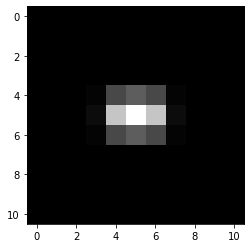

In [20]:
output = model(input)
output = F.softmax(output, dim=1)
prediction_score, pred_label_idx = torch.topk(output, 1)

classes = ['one','two']
pred_label_idx.squeeze_()
predicted_label = classes[pred_label_idx.item()]
print('Predicted:', predicted_label, '(', prediction_score.squeeze().item(), ')')
print(np.shape(transformed_img))
plt.imshow(transformed_img)